# Analytic Report on Food Price and Sales in 14 States in Nigeria

#### Data Source 
The dataset was downloaded from data.humdata.org[https://data.humdata.org/dataset/42db041f-7aaf-4ab4-961f-2a12096861e7/resource/12b51155-0cd3-4806-9924-61ede4077591/download/wfp_food_prices_nga.csv]

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt

import warnings

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('data/wfp_food_prices_nga.csv')
df.shape

(74422, 14)

In [3]:
# let's check unique values
columns=df.columns
for col in columns:
    print(col,':\n',df[col].unique())
    print(df[col].value_counts())
    print('\n',20*'**','\n')

date :
 ['#date' '2002-01-15' '2002-02-15' '2002-03-15' '2002-04-15' '2002-05-15'
 '2002-06-15' '2002-07-15' '2002-08-15' '2002-09-15' '2002-10-15'
 '2002-11-15' '2002-12-15' '2003-01-15' '2003-02-15' '2003-03-15'
 '2003-04-15' '2003-05-15' '2003-06-15' '2003-07-15' '2003-08-15'
 '2003-09-15' '2003-10-15' '2003-11-15' '2003-12-15' '2004-01-15'
 '2004-02-15' '2004-03-15' '2004-04-15' '2004-05-15' '2004-06-15'
 '2004-07-15' '2004-08-15' '2004-09-15' '2004-10-15' '2004-11-15'
 '2004-12-15' '2005-01-15' '2005-02-15' '2005-03-15' '2005-04-15'
 '2005-05-15' '2005-06-15' '2005-07-15' '2005-08-15' '2005-09-15'
 '2005-10-15' '2005-11-15' '2005-12-15' '2006-01-15' '2006-02-15'
 '2006-03-15' '2006-04-15' '2006-05-15' '2006-06-15' '2006-07-15'
 '2006-08-15' '2006-09-15' '2006-10-15' '2006-11-15' '2006-12-15'
 '2007-01-15' '2007-02-15' '2007-03-15' '2007-04-15' '2007-05-15'
 '2007-06-15' '2007-07-15' '2007-08-15' '2007-09-15' '2007-10-15'
 '2007-11-15' '2007-12-15' '2008-01-15' '2008-02-15' '2008-0

0.0        8886
0.0        2858
50.0       1961
200.0      1461
100.0      1337
           ... 
21675.0       1
149.89        1
25950.0       1
351.03        1
502.73        1
Name: price, Length: 19447, dtype: int64

 **************************************** 

usdprice :
 ['#value+usd' '1.5525' '1.3254' ... '1.0151' '0.0' 0.0]
0.0           8886
0.0           2858
0.1629         205
0.1397         150
0.1401         142
              ... 
0.206            1
90.9091          1
0.9341           1
1.9231           1
#value+usd       1
Name: usdprice, Length: 28636, dtype: int64

 **************************************** 



In [4]:
df.head()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,#date,#adm1+name,#adm2+name,#loc+market+name,#geo+lat,#geo+lon,#item+type,#item+name,#item+unit,#item+price+flag,#item+price+type,#currency,#value,#value+usd
1,2002-01-15,Katsina,Jibia,Jibia (CBM),13.08,7.24,cereals and tubers,Maize,KG,actual,Wholesale,NGN,175.92,1.5525
2,2002-01-15,Katsina,Jibia,Jibia (CBM),13.08,7.24,cereals and tubers,Millet,KG,actual,Wholesale,NGN,150.18,1.3254
3,2002-01-15,Katsina,Jibia,Jibia (CBM),13.08,7.24,cereals and tubers,Rice (imported),KG,actual,Wholesale,NGN,358.7,3.1656
4,2002-01-15,Katsina,Jibia,Jibia (CBM),13.08,7.24,cereals and tubers,Sorghum,KG,actual,Wholesale,NGN,155.61,1.3733


### Data cleaning

###### Check For Missing Value

In [5]:
#There is No Missing Value
df.isna().sum()

date         0
admin1       0
admin2       0
market       0
latitude     0
longitude    0
category     0
commodity    0
unit         0
priceflag    0
pricetype    0
currency     0
price        0
usdprice     0
dtype: int64

###### Removing The First Row and Reset the index

In [6]:
#Drop the first Row
df = df.iloc[1:]

In [7]:
# Reset the index
df = df.reset_index(drop=True)

In [8]:
df.head()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,2002-01-15,Katsina,Jibia,Jibia (CBM),13.08,7.24,cereals and tubers,Maize,KG,actual,Wholesale,NGN,175.92,1.5525
1,2002-01-15,Katsina,Jibia,Jibia (CBM),13.08,7.24,cereals and tubers,Millet,KG,actual,Wholesale,NGN,150.18,1.3254
2,2002-01-15,Katsina,Jibia,Jibia (CBM),13.08,7.24,cereals and tubers,Rice (imported),KG,actual,Wholesale,NGN,358.7,3.1656
3,2002-01-15,Katsina,Jibia,Jibia (CBM),13.08,7.24,cereals and tubers,Sorghum,KG,actual,Wholesale,NGN,155.61,1.3733
4,2002-01-15,Katsina,Jibia,Jibia (CBM),13.08,7.24,pulses and nuts,Beans (niebe),KG,actual,Wholesale,NGN,196.87,1.7374


In [9]:
df.columns

Index(['date', 'admin1', 'admin2', 'market', 'latitude', 'longitude',
       'category', 'commodity', 'unit', 'priceflag', 'pricetype', 'currency',
       'price', 'usdprice'],
      dtype='object')

###### Rename Admin1 and 2 to State and Local Government

In [10]:
df.rename(columns={'admin1': "state"}, inplace=True)
df.rename(columns={'admin2': "lga"}, inplace=True)

In [11]:
df.columns

Index(['date', 'state', 'lga', 'market', 'latitude', 'longitude', 'category',
       'commodity', 'unit', 'priceflag', 'pricetype', 'currency', 'price',
       'usdprice'],
      dtype='object')

In [12]:
df.head()

,date,state,lga,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,2002-01-15,Katsina,Jibia,Jibia (CBM),13.08,7.24,cereals and tubers,Maize,KG,actual,Wholesale,NGN,175.92,1.5525
1,2002-01-15,Katsina,Jibia,Jibia (CBM),13.08,7.24,cereals and tubers,Millet,KG,actual,Wholesale,NGN,150.18,1.3254
2,2002-01-15,Katsina,Jibia,Jibia (CBM),13.08,7.24,cereals and tubers,Rice (imported),KG,actual,Wholesale,NGN,358.7,3.1656
3,2002-01-15,Katsina,Jibia,Jibia (CBM),13.08,7.24,cereals and tubers,Sorghum,KG,actual,Wholesale,NGN,155.61,1.3733
4,2002-01-15,Katsina,Jibia,Jibia (CBM),13.08,7.24,pulses and nuts,Beans (niebe),KG,actual,Wholesale,NGN,196.87,1.7374


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74421 entries, 0 to 74420
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       74421 non-null  object
 1   state      74421 non-null  object
 2   lga        74421 non-null  object
 3   market     74421 non-null  object
 4   latitude   74421 non-null  object
 5   longitude  74421 non-null  object
 6   category   74421 non-null  object
 7   commodity  74421 non-null  object
 8   unit       74421 non-null  object
 9   priceflag  74421 non-null  object
 10  pricetype  74421 non-null  object
 11  currency   74421 non-null  object
 12  price      74421 non-null  object
 13  usdprice   74421 non-null  object
dtypes: object(14)
memory usage: 7.9+ MB


###### Convert date to datetime

In [14]:
df["date"] = pd.to_datetime(df['date'])

df['month']=df['date'].dt.month
df['day']=df['date'].dt.day
df['year'] = df['date'].dt.year

In [15]:
df.head()

,date,state,lga,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice,month,day,year
0,2002-01-15,Katsina,Jibia,Jibia (CBM),13.08,7.24,cereals and tubers,Maize,KG,actual,Wholesale,NGN,175.92,1.5525,1,15,2002
1,2002-01-15,Katsina,Jibia,Jibia (CBM),13.08,7.24,cereals and tubers,Millet,KG,actual,Wholesale,NGN,150.18,1.3254,1,15,2002
2,2002-01-15,Katsina,Jibia,Jibia (CBM),13.08,7.24,cereals and tubers,Rice (imported),KG,actual,Wholesale,NGN,358.7,3.1656,1,15,2002
3,2002-01-15,Katsina,Jibia,Jibia (CBM),13.08,7.24,cereals and tubers,Sorghum,KG,actual,Wholesale,NGN,155.61,1.3733,1,15,2002
4,2002-01-15,Katsina,Jibia,Jibia (CBM),13.08,7.24,pulses and nuts,Beans (niebe),KG,actual,Wholesale,NGN,196.87,1.7374,1,15,2002


In [16]:
## Rename the months
df['month'] = df['month'].replace({ 1: 'January', 2 : 'February' , 3 : 'March', 4: 'April', 5 : 'May', 6 : 'June', 7 :'July', 8 : 'August', 9: 'September', 10 : 'October', 11 : 'November', 12 : 'December'})

In [17]:
df.head()

,date,state,lga,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice,month,day,year
0,2002-01-15,Katsina,Jibia,Jibia (CBM),13.08,7.24,cereals and tubers,Maize,KG,actual,Wholesale,NGN,175.92,1.5525,January,15,2002
1,2002-01-15,Katsina,Jibia,Jibia (CBM),13.08,7.24,cereals and tubers,Millet,KG,actual,Wholesale,NGN,150.18,1.3254,January,15,2002
2,2002-01-15,Katsina,Jibia,Jibia (CBM),13.08,7.24,cereals and tubers,Rice (imported),KG,actual,Wholesale,NGN,358.7,3.1656,January,15,2002
3,2002-01-15,Katsina,Jibia,Jibia (CBM),13.08,7.24,cereals and tubers,Sorghum,KG,actual,Wholesale,NGN,155.61,1.3733,January,15,2002
4,2002-01-15,Katsina,Jibia,Jibia (CBM),13.08,7.24,pulses and nuts,Beans (niebe),KG,actual,Wholesale,NGN,196.87,1.7374,January,15,2002


#### Export the Clean Data

In [3]:
# Export current clean dataframe
df.to_csv("data/df_clean.csv" , index=False)

#### import the Clean Data

In [5]:
df = pd.read_csv("data/df_clean.csv")

In [8]:
df['country'] = 'Nigeria'

In [9]:
df.head()

,date,state,lga,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice,month,day,year,country
0,2002-01-15,Katsina,Jibia,Jibia (CBM),13.08,7.24,cereals and tubers,Maize,KG,actual,Wholesale,NGN,175.92,1.5525,January,15,2002,Nigeria
1,2002-01-15,Katsina,Jibia,Jibia (CBM),13.08,7.24,cereals and tubers,Millet,KG,actual,Wholesale,NGN,150.18,1.3254,January,15,2002,Nigeria
2,2002-01-15,Katsina,Jibia,Jibia (CBM),13.08,7.24,cereals and tubers,Rice (imported),KG,actual,Wholesale,NGN,358.70,3.1656,January,15,2002,Nigeria
3,2002-01-15,Katsina,Jibia,Jibia (CBM),13.08,7.24,cereals and tubers,Sorghum,KG,actual,Wholesale,NGN,155.61,1.3733,January,15,2002,Nigeria
4,2002-01-15,Katsina,Jibia,Jibia (CBM),13.08,7.24,pulses and nuts,Beans (niebe),KG,actual,Wholesale,NGN,196.87,1.7374,January,15,2002,Nigeria


In [10]:
# Export current clean dataframe
df.to_csv("data/df_clean1.csv" , index=False)

## Exploratory Data Analysis

In [9]:
df['month'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

In [10]:
df['month'].value_counts()

February     6777
May          6627
March        6551
January      6393
October      6350
April        6294
December     6283
November     6220
June         6078
September    5924
July         5487
August       5437
Name: month, dtype: int64

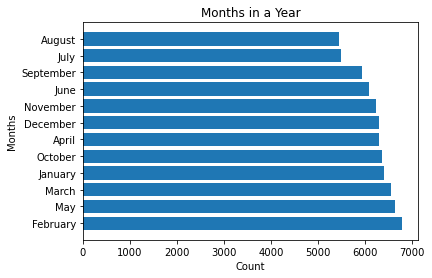

<Figure size 432x288 with 0 Axes>

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data
data = df['month']

# Count occurrences of each category
category_counts = pd.Series(data).value_counts()


# Create the horizontal bar plot
plt.barh(category_counts.index, category_counts.values)

# Add labels and title
plt.xlabel('Count')
plt.ylabel('Months')
plt.title('Months in a Year')

# Display the plot
plt.show()
plt.savefig("year_bar.png")

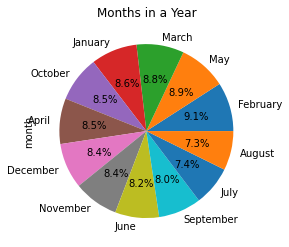

In [24]:
df['month'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('Months in a Year')
plt.savefig("year_pie.png")

In [48]:
df['year'].unique()

array([2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
      dtype=int64)

In [49]:
df['year'].value_counts()

2021    13414
2022    12565
2020     9655
2019     9054
2018     7990
2017     7355
2016     4296
2023     3222
2015     3064
2014     1464
2013      401
2012      320
2010      267
2011      264
2008      214
2009      191
2005      186
2003      171
2002      121
2006       99
2007       74
2004       34
Name: year, dtype: int64

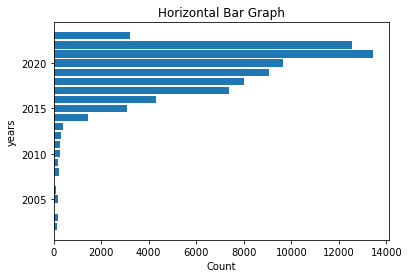

<Figure size 432x288 with 0 Axes>

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data
data = df['year']

# Count occurrences of each category
category_counts = pd.Series(data).value_counts()[:20]
#plt.figure(figsize=(12,6))df[df["type"]=="Movie"]["release_year"].value_counts()[:20].plot(kind="bar",color="Red")


# Create the horizontal bar plot
plt.barh(category_counts.index, category_counts.values)

# Add labels and title
plt.xlabel('Count')
plt.ylabel('years')
plt.title('Horizontal Bar Graph')

# Display the plot
plt.show()
plt.savefig("year_bar.png")

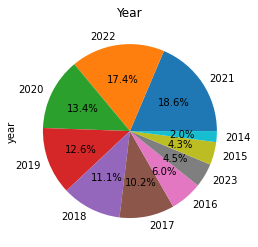

In [25]:
df['year'].value_counts()[:10].plot(kind='pie',autopct='%1.1f%%')
plt.title('Year')
plt.savefig("year_pie.jpg")

In [95]:
df['state'].unique()

array(['Katsina', 'Sokoto', 'Borno', 'Kano', 'Jigawa', 'Oyo', 'Lagos',
       'Kaduna', 'Zamfara', 'Abia', 'Gombe', 'Kebbi', 'Adamawa', 'Yobe'],
      dtype=object)

In [96]:
df['state'].value_counts()

Yobe       22753
Borno      19388
Kaduna      4847
Katsina     3638
Kano        2956
Oyo         2837
Jigawa      2734
Zamfara     2716
Kebbi       2702
Gombe       2699
Lagos       2556
Adamawa     2359
Abia        1602
Sokoto       633
Name: state, dtype: int64

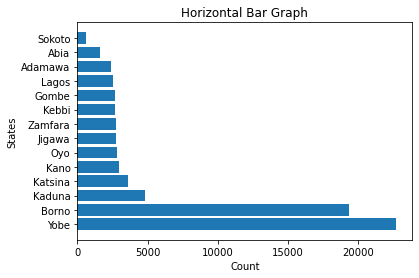

In [51]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data
data = df['state']

# Count occurrences of each category
category_counts = pd.Series(data).value_counts()


# Create the horizontal bar plot
plt.barh(category_counts.index, category_counts.values)

# Add labels and title
plt.xlabel('Count')
plt.ylabel('States')
plt.title('Horizontal Bar Graph')

# Display the plot
plt.show()

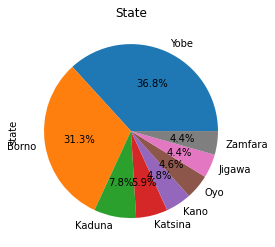

In [30]:
df['state'].value_counts()[:8].plot(kind='pie',autopct='%1.1f%%')
plt.title('State')
plt.savefig("state_pie.jpg")

In [99]:
df['market'].unique()

array(['Jibia (CBM)', 'Illela (CBM)', 'Mai Adoua (CBM)',
       'Damassack (CBM)', 'Dawanau', 'Mai Gatari (CBM)', 'Ibadan',
       'Maiduguri', 'Lagos', 'Giwa', 'Kaura Namoda', 'Aba', 'Gombe',
       'Gujungu', 'Saminaka', 'Dandume', 'Gwandu', 'Mubi', 'Biu',
       'Damaturu', 'Potiskum', 'Abba Gamaram', 'Baga Road', 'Bullunkutu',
       'Budum', 'Custom', 'Kusawam Shanu', 'Monday', 'Tashan Bama',
       'Bolori Stores', 'Damaturu (Sunday Market)', 'Geidam',
       'Gujba (Buni Yadi)', 'Jakusko', 'Bade (Gashua)', 'Nguru',
       'Yunusari', 'Yusufari', 'Bursari', 'Gulani (Tettaba)'],
      dtype=object)

In [100]:
df['market'].value_counts()

Potiskum                    3888
Dawanau                     2956
Ibadan                      2837
Maiduguri                   2766
Kaura Namoda                2716
Gwandu                      2702
Gombe                       2699
Lagos                       2556
Damaturu                    2548
Dandume                     2529
Giwa                        2499
Biu                         2452
Gujungu                     2385
Mubi                        2359
Saminaka                    2348
Baga Road                   1825
Budum                       1812
Abba Gamaram                1810
Monday                      1806
Tashan Bama                 1799
Custom                      1797
Geidam                      1689
Nguru                       1684
Bade (Gashua)               1683
Damaturu (Sunday Market)    1678
Bursari                     1654
Yunusari                    1648
Jakusko                     1629
Yusufari                    1621
Aba                         1602
Gujba (Bun

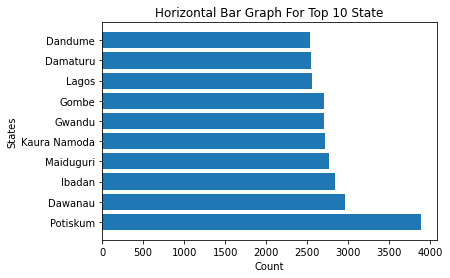

<Figure size 432x288 with 0 Axes>

In [33]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data
data = df['market']

# Count occurrences of each category
category_counts = pd.Series(data).value_counts()[:10]


# Create the horizontal bar plot
plt.barh(category_counts.index, category_counts.values)

# Add labels and title
plt.xlabel('Count')
plt.ylabel('States')
plt.title('Horizontal Bar Graph For Top 10 State')
# Display the plot
plt.show()
plt.savefig("state_bar.jpg")

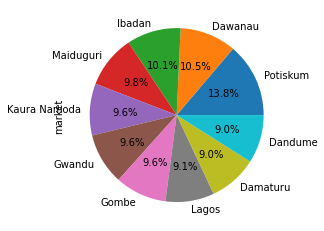

In [34]:
df['market'].value_counts()[:10].plot(kind='pie',autopct='%1.1f%%')
plt.savefig("market_pie.jpg")

In [39]:
df['category'].unique()

array(['cereals and tubers', 'pulses and nuts', 'non-food',
       'oil and fats', 'meat, fish and eggs', 'milk and dairy',
       'vegetables and fruits', 'miscellaneous food'], dtype=object)

In [40]:
df['category'].value_counts()

cereals and tubers       37761
pulses and nuts          12661
vegetables and fruits     7437
meat, fish and eggs       5259
oil and fats              4381
non-food                  3295
miscellaneous food        2304
milk and dairy            1322
Name: category, dtype: int64

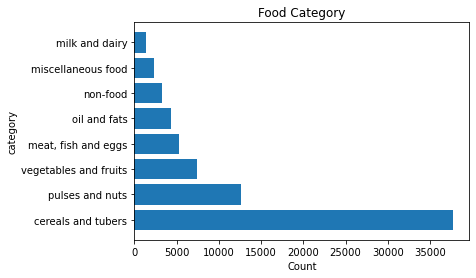

In [109]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data
data = df['category']

# Count occurrences of each category
category_counts = pd.Series(data).value_counts()


# Create the horizontal bar plot
plt.barh(category_counts.index, category_counts.values)

# Add labels and title
plt.xlabel('Count')
plt.ylabel('category')
plt.title('Food Category')

# Display the plot
plt.show()

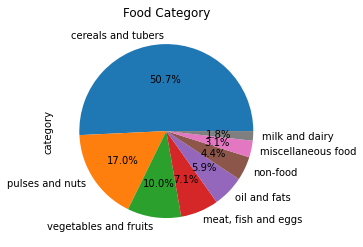

In [36]:
df['category'].value_counts()[:10].plot(kind='pie',autopct='%1.1f%%')
plt.title('Food Category')
plt.savefig("food_category_pie.jpg")

In [43]:
df['commodity'].unique()

array(['Millet', 'Rice (imported)', 'Sorghum', 'Beans (niebe)', 'Maize',
       'Wheat', 'Maize (white)', 'Sorghum (white)',
       'Rice (milled, local)', 'Bread', 'Cassava meal (gari, yellow)',
       'Gari (white)', 'Maize (yellow)', 'Rice (local)',
       'Sorghum (brown)', 'Yam (Abuja)', 'Fuel (diesel)',
       'Fuel (petrol-gasoline)', 'Oil (palm)', 'Cowpeas (brown)',
       'Cowpeas (white)', 'Yam', 'Groundnuts (shelled)', 'Maize flour',
       'Meat (beef)', 'Meat (goat)', 'Milk', 'Oil (vegetable)',
       'Beans (red)', 'Beans (white)', 'Groundnuts', 'Onions', 'Fish',
       'Eggs', 'Bananas', 'Oranges', 'Spinach', 'Watermelons', 'Cowpeas',
       'Tomatoes', 'Salt', 'Sugar'], dtype=object)

In [44]:
df['commodity'].value_counts()

Millet                         4631
Rice (imported)                4307
Rice (local)                   3863
Yam                            3694
Oil (palm)                     3052
Maize (white)                  2856
Sorghum (white)                2786
Cowpeas (white)                2608
Groundnuts (shelled)           2565
Sorghum (brown)                2556
Gari (white)                   2500
Maize (yellow)                 2465
Cowpeas (brown)                2425
Cassava meal (gari, yellow)    2223
Sorghum                        1882
Fuel (petrol-gasoline)         1652
Fuel (diesel)                  1643
Bread                          1561
Beans (white)                  1339
Groundnuts                     1333
Oil (vegetable)                1329
Meat (beef)                    1328
Meat (goat)                    1325
Milk                           1322
Beans (red)                    1320
Maize flour                    1320
Onions                         1313
Fish                        

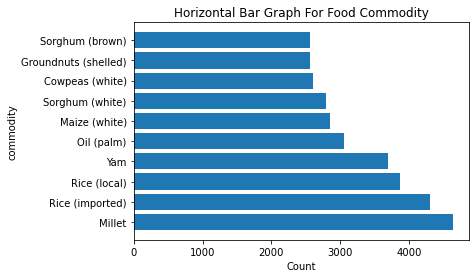

In [114]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data
data = df['commodity']

# Count occurrences of each category
category_counts = pd.Series(data).value_counts()[:10]


# Create the horizontal bar plot
plt.barh(category_counts.index, category_counts.values)

# Add labels and title
plt.xlabel('Count')
plt.ylabel('commodity')
plt.title('Horizontal Bar Graph For Food Commodity')

# Display the plot
plt.show()

<AxesSubplot:ylabel='commodity'>

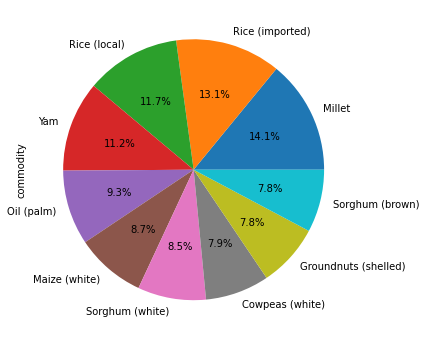

In [112]:
df['commodity'].value_counts()[:10].plot(kind='pie',autopct='%1.1f%%', figsize=(6,6))

In [47]:
df['unit'].unique()

array(['KG', '100 KG', '50 KG', 'Unit', 'L', '100 L', '1.3 KG', '1.4 KG',
       '3.4 KG', '20 G', '750 ML', '1.1 KG', '0.5 KG', '1.5 KG', '30 pcs',
       '400 G', '300 G', '2.1 KG', '3.1 KG', '1.2 KG', '250 G',
       '100 Tubers'], dtype=object)

In [48]:
df['unit'].value_counts()

100 KG        18389
KG            17806
1.3 KG         5999
L              4907
1.4 KG         4376
1.2 KG         3647
750 ML         2664
400 G          2018
50 KG          1892
0.5 KG         1774
Unit           1561
20 G           1322
30 pcs         1293
2.1 KG         1292
250 G          1152
300 G          1073
3.1 KG          728
100 Tubers      650
1.1 KG          600
3.4 KG          594
1.5 KG          590
100 L            93
Name: unit, dtype: int64

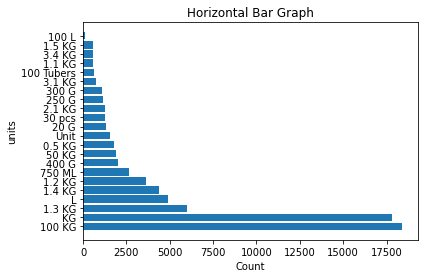

In [79]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data
data = df['unit']

# Count occurrences of each category
category_counts = pd.Series(data).value_counts()


# Create the horizontal bar plot
plt.barh(category_counts.index, category_counts.values)

# Add labels and title
plt.xlabel('Count')
plt.ylabel('units')
plt.title('Horizontal Bar Graph')

# Display the plot
plt.show()

<AxesSubplot:ylabel='unit'>

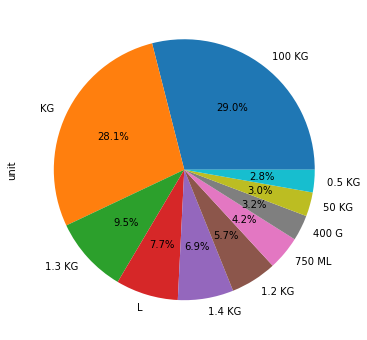

In [113]:
df['unit'].value_counts()[:10].plot(kind='pie',autopct='%1.1f%%', figsize=(6,6))

In [51]:
df['priceflag'].unique()

array(['actual', 'actual,aggregate', 'aggregate', 'forecast'],
      dtype=object)

In [52]:
df['priceflag'].value_counts()

actual              48106
aggregate           14116
forecast            11744
actual,aggregate      454
Name: priceflag, dtype: int64

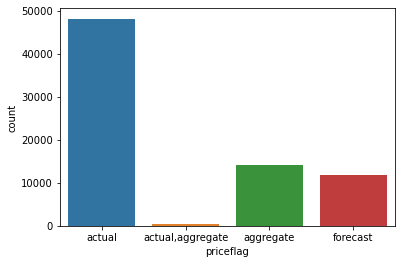

In [37]:
sns.countplot(x="priceflag", data=df)
plt.savefig("price_flag_bar.jpg")

<AxesSubplot:ylabel='priceflag'>

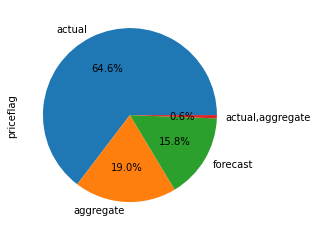

In [54]:
df['priceflag'].value_counts().plot(kind='pie',autopct='%1.1f%%')

In [55]:
df['pricetype'].unique()

array(['Wholesale', 'Retail'], dtype=object)

In [56]:
df['pricetype'].value_counts()

Retail       50472
Wholesale    23948
Name: pricetype, dtype: int64

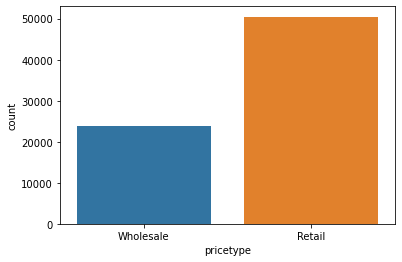

In [38]:
sns.countplot(x="pricetype", data=df)
plt.savefig("pricetype_bar.jpg")

<AxesSubplot:ylabel='pricetype'>

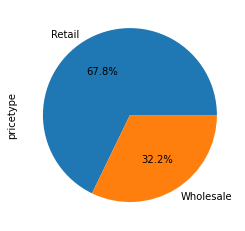

In [58]:
df['pricetype'].value_counts().plot(kind='pie',autopct='%1.1f%%')

In [63]:
df['price'].unique()

array(['150.18', '358.7', '155.61', ..., '467.66', '0.0', 0.0],
      dtype=object)

In [64]:
df['price'].value_counts()

0.0        8886
0.0        2858
50.0       1961
200.0      1461
100.0      1337
           ... 
25950.0       1
351.03        1
114.83        1
181.73        1
59250.0       1
Name: price, Length: 19446, dtype: int64

In [65]:
df['usdprice'].value_counts()

0.0        8886
0.0        2858
0.1629      205
0.1397      150
0.1401      142
           ... 
21.4372       1
17.9393       1
0.6537        1
18.2715       1
2.3227        1
Name: usdprice, Length: 28635, dtype: int64

In [130]:
df['latitude'].value_counts()

11.707240104675293    3323
12.090120315551758    2579
7.4019598960876465    2452
11.831100463867188    2376
12.595190048217773    2326
                      ... 
10.813901901245115     172
13.062664985656738     171
11.285202026367188     170
12.201859474182127     168
11.85260253             78
Name: latitude, Length: 72, dtype: int64

In [84]:
df.describe()

,latitude,longitude,price,usdprice,day,year
count,74421.000000,74421.000000,74421.000000,74421.000000,74421.0,74421.000000
mean,11.349676,10.155877,5073.734934,30.278250,15.0,2019.112804
std,1.733798,2.982014,10831.866336,332.223652,0.0,2.961207
min,5.147640,3.401897,0.000000,0.000000,15.0,2002.000000
25%,11.280160,8.230000,107.750000,0.330000,15.0,2018.000000
50%,11.831100,11.166670,325.000000,0.983900,15.0,2020.000000
75%,12.362300,13.092646,1400.000000,4.877100,15.0,2021.000000
max,13.645000,13.264360,138000.000000,28662.419400,15.0,2023.000000


Tableau dashboard : https://public.tableau.com/app/profile/olawuwo.abideen/viz/FoodPrice_16898611625970/FoodPrice?publish=yes